In [1]:
import os
import json
import numpy as np

import matplotlib.pyplot as plt

# BAGLS dataset

In [10]:
path = "Mini_BAGLS_dataset"  # you can use the Mini_BAGLS_dataset that we have provided for the homework

In [11]:
# get all filenames
files = os.listdir(path)

# what is os.listdir() returning?
# type ==> list()
print(type(files))

print(files)

<class 'list'>
['0.meta', '0.png', '0_seg.png', '1.meta', '1.png', '10.meta', '10.png', '10_seg.png', '11.meta', '11.png', '11_seg.png', '12.meta', '12.png', '12_seg.png', '13.meta', '13.png', '13_seg.png', '14.meta', '14.png', '14_seg.png', '15.meta', '15.png', '15_seg.png', '16.meta', '16.png', '16_seg.png', '17.meta', '17.png', '17_seg.png', '18.meta', '18.png', '18_seg.png', '19.meta', '19.png', '19_seg.png', '1_seg.png', '2.meta', '2.png', '20.meta', '20.png', '20_seg.png', '21.meta', '21.png', '21_seg.png', '22.meta', '22.png', '22_seg.png', '23.meta', '23.png', '23_seg.png', '24.meta', '24.png', '24_seg.png', '25.meta', '25.png', '25_seg.png', '26.meta', '26.png', '26_seg.png', '27.meta', '27.png', '27_seg.png', '28.meta', '28.png', '28_seg.png', '29.meta', '29.png', '29_seg.png', '2_seg.png', '3.meta', '3.png', '30.meta', '30.png', '30_seg.png', '31.meta', '31.png', '31_seg.png', '32.meta', '32.png', '32_seg.png', '33.meta', '33.png', '33_seg.png', '34.meta', '34.png', '34_seg.

In [12]:
# pathlib is a nice library to work with paths
from pathlib import Path
path_pathlib = Path(path)
path_pathlib

WindowsPath('Mini_BAGLS_dataset')

In [24]:
# iterate over a list
for f in files:
    print(f)

IndentationError: expected an indented block (1910662867.py, line 2)

In [14]:
# get all unique filenames (e.g. each filename with file extension '.meta')
filenames = [f for f in files if '.meta' in f]
filenames

['0.meta',
 '1.meta',
 '10.meta',
 '11.meta',
 '12.meta',
 '13.meta',
 '14.meta',
 '15.meta',
 '16.meta',
 '17.meta',
 '18.meta',
 '19.meta',
 '2.meta',
 '20.meta',
 '21.meta',
 '22.meta',
 '23.meta',
 '24.meta',
 '25.meta',
 '26.meta',
 '27.meta',
 '28.meta',
 '29.meta',
 '3.meta',
 '30.meta',
 '31.meta',
 '32.meta',
 '33.meta',
 '34.meta',
 '35.meta',
 '36.meta',
 '37.meta',
 '38.meta',
 '39.meta',
 '4.meta',
 '40.meta',
 '41.meta',
 '42.meta',
 '43.meta',
 '44.meta',
 '45.meta',
 '46.meta',
 '47.meta',
 '48.meta',
 '49.meta',
 '5.meta',
 '50.meta',
 '51.meta',
 '52.meta',
 '53.meta',
 '54.meta',
 '55.meta',
 '56.meta',
 '57.meta',
 '58.meta',
 '59.meta',
 '6.meta',
 '60.meta',
 '61.meta',
 '62.meta',
 '63.meta',
 '64.meta',
 '65.meta',
 '66.meta',
 '67.meta',
 '68.meta',
 '69.meta',
 '7.meta',
 '70.meta',
 '71.meta',
 '72.meta',
 '73.meta',
 '74.meta',
 '75.meta',
 '76.meta',
 '77.meta',
 '78.meta',
 '79.meta',
 '8.meta',
 '80.meta',
 '81.meta',
 '82.meta',
 '83.meta',
 '84.meta',
 

In [15]:
# another way to combine os.listdir() and the for loop in one line --> use glob
import glob
glob_filenames = glob.glob(path + "/*.meta")
glob_filenames

['Mini_BAGLS_dataset\\0.meta',
 'Mini_BAGLS_dataset\\1.meta',
 'Mini_BAGLS_dataset\\10.meta',
 'Mini_BAGLS_dataset\\11.meta',
 'Mini_BAGLS_dataset\\12.meta',
 'Mini_BAGLS_dataset\\13.meta',
 'Mini_BAGLS_dataset\\14.meta',
 'Mini_BAGLS_dataset\\15.meta',
 'Mini_BAGLS_dataset\\16.meta',
 'Mini_BAGLS_dataset\\17.meta',
 'Mini_BAGLS_dataset\\18.meta',
 'Mini_BAGLS_dataset\\19.meta',
 'Mini_BAGLS_dataset\\2.meta',
 'Mini_BAGLS_dataset\\20.meta',
 'Mini_BAGLS_dataset\\21.meta',
 'Mini_BAGLS_dataset\\22.meta',
 'Mini_BAGLS_dataset\\23.meta',
 'Mini_BAGLS_dataset\\24.meta',
 'Mini_BAGLS_dataset\\25.meta',
 'Mini_BAGLS_dataset\\26.meta',
 'Mini_BAGLS_dataset\\27.meta',
 'Mini_BAGLS_dataset\\28.meta',
 'Mini_BAGLS_dataset\\29.meta',
 'Mini_BAGLS_dataset\\3.meta',
 'Mini_BAGLS_dataset\\30.meta',
 'Mini_BAGLS_dataset\\31.meta',
 'Mini_BAGLS_dataset\\32.meta',
 'Mini_BAGLS_dataset\\33.meta',
 'Mini_BAGLS_dataset\\34.meta',
 'Mini_BAGLS_dataset\\35.meta',
 'Mini_BAGLS_dataset\\36.meta',
 'Mini_BAGLS

In [16]:
# get filename (separate the number from the file extension)
print(filenames[4].split(".")[0])

path_pathlib = path_pathlib / "1009.meta"
print(path_pathlib.stem)

12
1009


In [17]:
# iterate over the filenames (with index)
for idx, f in enumerate(filenames):
    print(idx, f)
    break
    
# out: Index: X, Filename: YYYY

0 0.meta


In [23]:
import imageio.v3 as io
from PIL import Image
import skimage
import cv2

## load image with different libraries
img_path = 'Mini_BAGLS_dataset/752.png'
img = io.imread(img_path)
img = Image.open(img_path)
img = skimage.io.imread(img_path)
img = cv2.imread(img_path); img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# load image as grayscale
img = skimage.io.imread(img_path, as_gray=True)
plt.imshow(img, cmap='gray')

ModuleNotFoundError: No module named 'imageio.v3'

In [ ]:
# which image loading function to use?
import time
def test_read_image(imgfile, func):
    t0 = time.time()
    img = func(imgfile)
    t = time.time() - t0
    return t

functions = [io.imread, Image.open, skimage.io.imread, cv2.imread]

times = []
for func in functions:
    ts = []
    # load each image
    for f in filenames:
        name = f.split(".")[0]
        t = test_read_image(os.path.join(path, name + ".png"), func)
        ts.append(t)
    times.append(ts)

In [ ]:
# Note: we are calculating the mean time for each image loading method here
for t, func in zip(times, functions):
    print(str(func))
    print("{:.6f} seconds".format(np.mean(t)))
    print("_____")

In [ ]:
for idx, f in enumerate(glob_filenames):
    # make sure to only look at the first 5 samples and not all 2000 of them
    if idx == 5:
        break
    
    # get basename
    basename = os.path.basename(f)
        
    # split name
    name = basename.split(".")[0]
    
    # load image and segmentation mask
    img_path = os.path.join(path, name + ".png")
    seg_path = os.path.join(path, name + "_seg.png")
    img = io.imread(img_path)
    seg = io.imread(seg_path)

    # visualize image and segmentation mask
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))
    ax1.axis("off"); ax2.axis("off")

    # show both
    ax1.imshow(img);ax2.imshow(seg)    
    plt.show()

In [25]:
ref_image = img
plt.imshow(ref_image)

NameError: name 'img' is not defined

In [ ]:
# saving with different formats

# tif
io.imwrite("saved_image.tif", ref_image)

# png
io.imwrite("saved_image.png", ref_image)

# jpg
io.imwrite("saved_image90.jpg", ref_image, quality=90) # quality specifies how much the saved JPEG image should be compressed
io.imwrite("saved_image10.jpg", ref_image, quality=10)

In [ ]:
# check out memory footprints
img_tif_size = os.path.getsize("saved_image.tif")
img_png_size = os.path.getsize("saved_image.png")
img_jpg90_size = os.path.getsize("saved_image90.jpg")
img_jpg10_size = os.path.getsize("saved_image10.jpg")

plt.bar([0, 1, 2, 3], [img_tif_size, img_png_size, img_jpg90_size, img_jpg10_size])
plt.xticks([0, 1, 2, 3], [".tif", ".png", ".jpg (90)", ".jpg (10)"])
plt.ylabel("File size [bytes]")

### Check out exercise slide here --> JPEG compression

In [22]:
# load images
img_tif = io.imread("saved_image.tif")
img_png = io.imread("saved_image.png")
img_jpg90 = io.imread("saved_image90.jpg")
img_jpg10 = io.imread("saved_image90.jpg")

NameError: name 'io' is not defined

In [ ]:
# compare them to each other
np.allclose(ref_image, img_tif)
np.allclose(ref_image, img_png)
np.allclose(ref_image, img_jpg90)
#np.allclose(ref_image, img_jpg10)

### Calculate [PSNR](https://www.ni.com/de-de/innovations/white-papers/11/peak-signal-to-noise-ratio-as-an-image-quality-metric.html) between images

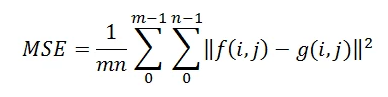

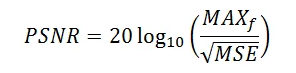

In [ ]:
def psnr(img1, img2):
    #mean squared error:
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "MSE is zero"
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [ ]:
print(psnr(ref_image, img_tif))
print(psnr(ref_image, img_png))
print(psnr(ref_image, img_jpg))

print(psnr(ref_image, np.random.randint(0, 255, ref_image.shape)))

In [ ]:
import pandas as pd

# get all meta data information 
all_meta_data = []

for f in glob_filenames:
    # open .meta file
    meta_file = open(f)
    meta_data = json.load(meta_file)
    all_meta_data.append(meta_data)
    
df = pd.DataFrame(all_meta_data)
df

In [ ]:
df.to_csv("metadata.csv")

## Load Glottis video from BAGLS

In [ ]:
vid_path = path + "/glottis_video.mp4"  # you can use any arbitrary .mp4 video here or download a glottis video from here: https://www.bagls.org/

In [ ]:
from IPython.display import Video
Video(vid_path)

In [ ]:
# load video using scikit-video

import skvideo.io  
glottis_video = skvideo.io.vread(path + "/glottis_video.mp4")  
glottis_video.shape

In [ ]:
# load video using imageio

import imageio
glottis_video = imageio.mimread(path + "/glottis_video.mp4")
np.asarray(glottis_video).shape

In [ ]:
import ipywidgets as widgets

alpha_slider = widgets.FloatSlider(
    value=1.,
    min=0,
    max=1.0,
    step=0.01,
    description='Alpha',
)

@widgets.interact(n=(0, len(glottis_video)-1))
def f(n=5, alpha=alpha_slider):
    plt.imshow(glottis_video[n], alpha=alpha)

In [ ]:
# load video frame by frame by creating an iterable reader object

vid_reader = imageio.get_reader(path + "/glottis_video.mp4",  'ffmpeg')

for frame in vid_reader.iter_data():
    plt.imshow(frame)
    break

In [ ]:
# JSON files
metadata = vid_reader.get_meta_data()
metadata

In [ ]:
import json

with open('video_metadata_example.json', 'w') as f:
    json.dump(metadata, f, indent=2)

In [ ]:
with open('video_metadata_example.json', 'r') as f:
    data = json.load(f)
data

In [ ]:
# save videos lossless

imageio.mimwrite("saved_video.mp4", 
                 glottis_video,   # video 
                 fps=10,          # frames per second
                 codec='libx264rgb',   # use the right codec
                 pixelformat='rgb24',   # and pixel format
                 output_params=['-crf', '0',      # Ensure setting crf to 0
                                '-preset', 'veryslow']) # Maximum compression: veryslow, 
                                                         # maximum speed: ultrafast
    
# check out file size depending on 'veryslow' or 'ultrafast'
os.path.getsize("saved_video.mp4")

In [ ]:
# save videos lossless

imageio.mimwrite("saved_video.mp4", 
                 glottis_video,   # video 
                 fps=10,          # frames per second
                 codec='libx264rgb',   # use the right codec
                 pixelformat='rgb24',   # and pixel format
                 output_params=['-crf', '0',      # Ensure setting crf to 0
                                '-preset', 'ultrafast']) # Maximum compression: veryslow, 
                                                         # maximum speed: ultrafast
    
# check out file size depending on 'veryslow' or 'ultrafast'
os.path.getsize("saved_video.mp4")

In [ ]:
# compare original loaded videeo and the saved video

saved_vid = imageio.mimread("saved_video.mp4")
np.allclose(glottis_video, saved_vid)

In [ ]:
# Flammkuchen
import flammkuchen as fl

d = {
    'tabular': pd.DataFrame(np.random.random((20,40))), # random tabular data
     'videos': np.random.randint(0, 256, (30, 256, 256, 3)).astype(np.uint8), # random video
     'json': dict(name='John Doe', age=32, gender="d") # random meta data
}

fl.save("my_hdf5_file.h5", d)

In [ ]:
fl.meta("my_hdf5_file.h5")

In [ ]:
random_video = fl.load("my_hdf5_file.h5", "/videos")
random_video.shape

In [ ]:
# And only a portion of the video, e.g. only the red channel of the first 5 frames
r_first_5_frames = fl.load("my_hdf5_file.h5", "/videos", sel=fl.aslice[:5, ..., 0])
r_first_5_frames.shape